In [1]:
# load data

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

print(type(areas))
print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', data_size)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

<class 'numpy.ndarray'>
areas:  [6.7 4.6 3.5 5.5]
prices:  [9.1 5.9 4.6 6.7]
data_size:  4


<Figure size 640x480 with 1 Axes>

In [6]:
# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
print(data)

n_epochs = 1
eta = 0.01

theta = np.array([[-0.34],[0.04]])
print('theta', theta)

for epoch in range(n_epochs):
    sum_of_losses = 0
    gradients = np.zeros((2,1))
    
    for index in range(data_size):
        xi = data[index:index+1]
        yi = prices[index:index+1]
        print('\ndata: ', xi, yi)

        oi = xi.dot(theta)
        li = (oi - yi)*(oi - yi)        
        g_li = 2*(oi - yi)
        
        print('z: ', oi)
        print('loss: ', index, li)
        print('gradient_loss: ', index, g_li)
        
        cg = xi.T.dot(g_li)
        print('variable gradient: ', index, cg)
        
        gradients = gradients + cg
        sum_of_losses = sum_of_losses + li
    
    sum_of_losses = sum_of_losses/data_size
    print('\nsum_of_losses: ', sum_of_losses)
    
    gradients     = gradients/data_size
    print('\ngradients: ', gradients)
    
    theta = theta - eta*gradients
    print('new params: ', theta)

[[6.7 1. ]
 [4.6 1. ]
 [3.5 1. ]
 [5.5 1. ]]
theta [[-0.34]
 [ 0.04]]

data:  [[6.7 1. ]] [9.1]
z:  [[-2.238]]
loss:  0 [[128.550244]]
gradient_loss:  0 [[-22.676]]
variable gradient:  0 [[-151.9292]
 [ -22.676 ]]

data:  [[4.6 1. ]] [5.9]
z:  [[-1.524]]
loss:  1 [[55.115776]]
gradient_loss:  1 [[-14.848]]
variable gradient:  1 [[-68.3008]
 [-14.848 ]]

data:  [[3.5 1. ]] [4.6]
z:  [[-1.15]]
loss:  2 [[33.0625]]
gradient_loss:  2 [[-11.5]]
variable gradient:  2 [[-40.25]
 [-11.5 ]]

data:  [[5.5 1. ]] [6.7]
z:  [[-1.83]]
loss:  3 [[72.7609]]
gradient_loss:  3 [[-17.06]]
variable gradient:  3 [[-93.83]
 [-17.06]]

sum_of_losses:  [[72.372355]]

gradients:  [[-88.5775]
 [-16.521 ]]
new params:  [[0.545775]
 [0.20521 ]]


In [8]:
# full code

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

n_epochs = 10
eta = 0.01

theta = np.array([[-0.34],[0.04]])

losses = [] # for debug
for epoch in range(n_epochs):
    sum_of_losses = 0
    gradients = np.zeros((2,1))
    
    for index in range(data_size):
        xi = data[index:index+1]
        yi = prices[index:index+1]

        oi = xi.dot(theta)
        li = (oi - yi)*(oi - yi)        
        g_li = 2*(oi - yi)
        
        cg = xi.T.dot(g_li)
        
        gradients = gradients + cg
        sum_of_losses = sum_of_losses + li
    
    sum_of_losses = sum_of_losses/data_size   
    losses.append(sum_of_losses[0][0]) 
    
    gradients     = gradients/data_size    
    theta = theta - eta*gradients    

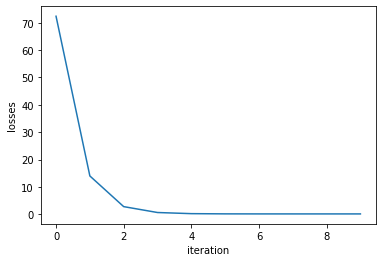

In [9]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()